In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
import pickle

folder_path = "../results/Italy/different_norms"
filename = "results_1.pickle"

with open(folder_path + "/" + filename, 'rb') as f:
    metrics = pickle.load(f)

In [21]:
mechanisms = ["GaussOpt_p1", "GaussOpt_p2", "GaussOpt_pinf", "GaussOpt_pinf_IntOpt"]
markers = [["-s", "-*", "-v", "-8", "-P"], ["--s", "--*", "--v", "--8", "--P"]]
colors = ["blue", "orange", "red", "green"]
geo_level = 3
levels: list[tuple] = [(i, i) if i == j else (i, j) for i in range(geo_level + 1) for j in range(i, i + 2) if
                       j < geo_level + 1]

In [22]:
import os

folder_path = "../plots/Italy/different_norms"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [23]:
mechanisms = [r"$\text{GaussOpt}-{\ell_2}$", r"$\text{GaussOpt}-{\ell_\infty}$",
              r"$\text{GaussOpt}-{\ell_\infty}-\text{IntOpt}$"]
markers = [["-s", "-*", "-v", "-8", "-P"], ["--s", "--*", "--v", "--8", "--P"]]
colors = plt.cm.viridis(np.linspace(0, 1, len(mechanisms)))  # Generate distinct colors

In [24]:
epsilons = [1., 10.]
delta = 1E-8
num_experiments = 5

# mechanisms, epsilons, experiments, levels
num_mechanisms = 3

In [32]:
def plot(array, save_to: str = None, name: str = None, log: bool = True, y_label: str = None):
    fig, ax = plt.subplots(figsize=(6, 6))
    for i, mechanism in enumerate(mechanisms):
        for j, epsilon in enumerate(epsilons):
            # plot error bar line for each level using min max
            error = np.array([np.mean(array[i, j], axis=0) - np.min(array[i, j], axis=0),
                              np.max(array[i, j], axis=0) - np.mean(array[i, j], axis=0)])
            ax.errorbar(range(len(levels)), np.mean(array[i, j], axis=0), yerr=error,
                        label=mechanism + r" $\varepsilon$: " + str(epsilon),
                        fmt=markers[j][i], color=colors[i], capsize=3)
    if log: ax.set_yscale("log")
    # Setting labels and ticks
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel("Level", fontsize=15)  # Optional: Add an x-label for clarity
    # ax.set_xticks(range(len(levels)))
    # ax.set_xticklabels(levels, rotation=45, ha='right')  # Set oblique labels
    # augment font size
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # Display the plot
    plt.grid(True)
    plt.tight_layout()
    # save a version with no legend
    if save_to is not None and name is not None:
        if os.path.exists(save_to) is False:
            os.makedirs(save_to)
        plt.savefig(os.path.join(save_to, name) + "_nolegend.pdf", dpi=300)
    # Adding a legend
    plt.legend()
    # save
    plt.tight_layout()
    if save_to is not None and name is not None:
        plt.savefig(os.path.join(save_to, name) + ".pdf", dpi=300)
    plt.show()

In [33]:
def MAE_plot(MAE, std, save_to: str = None, name: str = None, log: bool = True):
    fig, ax = plt.subplots(figsize=(6, 6))
    for i, mechanism in enumerate(mechanisms):
        for j, epsilon in enumerate(epsilons):
            ax.errorbar(range(len(levels)), MAE[i, j], yerr=std[i, j],
                        label=mechanism + f" eps: {epsilon}",
                        fmt=markers[j][i], color=colors[i], capsize=3)
    if log: ax.set_yscale("log")
    # Setting labels and ticks
    ax.set_ylabel("Absolute Error", fontsize=15)
    ax.set_xlabel("Level", fontsize=15)  # Optional: Add an x-label for clarity
    # ax.set_xticks(range(len(levels)))
    # ax.set_xticklabels(levels, rotation=45, ha='right')  # Set oblique labels
    # augment font size
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # Display the plot
    plt.grid(True)
    # save a version with no legend
    if save_to is not None and name is not None:
        if os.path.exists(save_to) is False:
            os.makedirs(save_to)
        plt.savefig(os.path.join(save_to, name) + "_nolegend.pdf", dpi=300)
    # Adding a legend
    plt.legend()
    # save
    plt.tight_layout()
    if save_to is not None and name is not None:
        plt.savefig(os.path.join(save_to, name) + ".pdf", dpi=300)
    plt.show()

In [53]:
def plot_time(execution_times, save_to: str = None, name: str = None):
    # Compute mean, min, and max for each mechanism and epsilon
    mean_times = execution_times.mean(axis=2)
    min_times = execution_times.min(axis=2)
    max_times = execution_times.max(axis=2)

    # Compute error bars
    error_bars = [mean_times - min_times, max_times - mean_times]

    # Plotting parameters
    colors = plt.cm.viridis(np.linspace(0, 1, len(epsilons)))  # Generate distinct colors
    x_positions = np.arange(len(mechanisms))
    bar_width = 0.3  # Width of each bar

    # Plot
    plt.figure(figsize=(8, 6))
    for i, epsilon in enumerate(epsilons):
        # Offset the x positions for grouped bars
        positions = x_positions + (i - len(epsilons) / 2) * bar_width
        plt.bar(
            positions,
            mean_times[:, i],
            bar_width,
            yerr=[error_bars[0][:, i], error_bars[1][:, i]],
            capsize=5,
            label=f"$\epsilon$ = {epsilon}",
            color=colors[i],
            edgecolor='black',
            linewidth=1,
        )

    # Set x-ticks at the center of each group
    x_ticks_positions = np.arange(num_mechanisms) - 0.15
    plt.xticks(x_ticks_positions, mechanisms)

    plt.ylabel("Execution Time (s)")
    plt.xlabel("Optimization")
    # plt.title("Execution Time by Mechanism and Epsilon")
    
    # change size of ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # change size of y labels
    plt.ylabel("Execution Time (s)", fontsize=15)
    # remove x labels
    plt.xlabel("", fontsize=15)
    
    plt.tight_layout()
    if save_to is not None and name is not None:
        if os.path.exists(save_to) is False:
            os.makedirs(save_to)
        plt.savefig(os.path.join(save_to, name) + "_nolegend.pdf", dpi=300)
    plt.legend(title="Epsilon")

    plt.tight_layout()
    if save_to is not None and name is not None:
        plt.savefig(os.path.join(save_to, name) + ".pdf", dpi=300)
    plt.show()

 ## Maximum Absolute Error per Level

In [42]:
metrics_to_plot = metrics
save_to = "../plots/Italy/different_norms/"

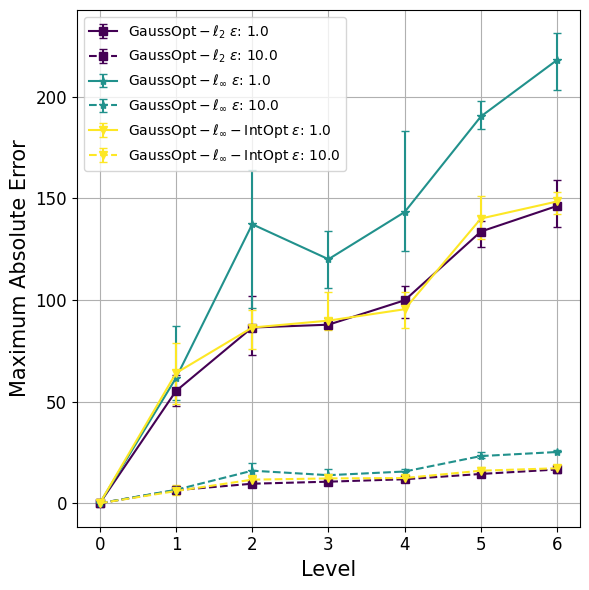

In [43]:
plot(metrics_to_plot["max_error"], y_label="Maximum Absolute Error", log=False, save_to=save_to, name="max_error")

## Mean Absolute Error per Level

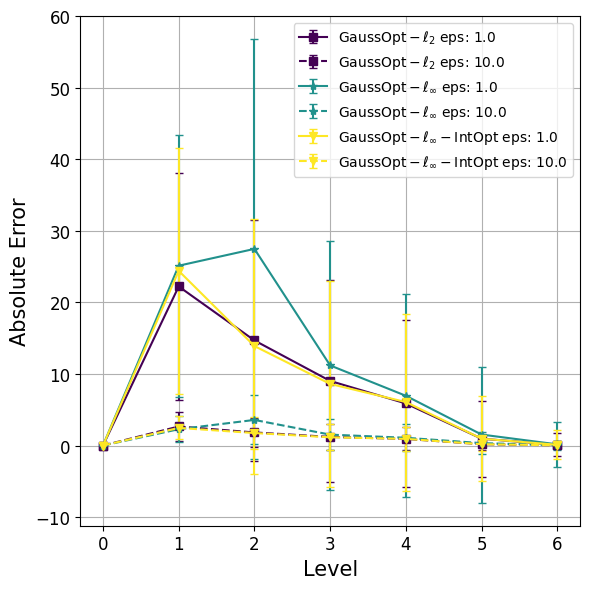

In [44]:
MAE_plot(metrics_to_plot["MAE"], metrics_to_plot["std"], save_to=save_to, name="MAE", log=False)

## False Discovery Rate

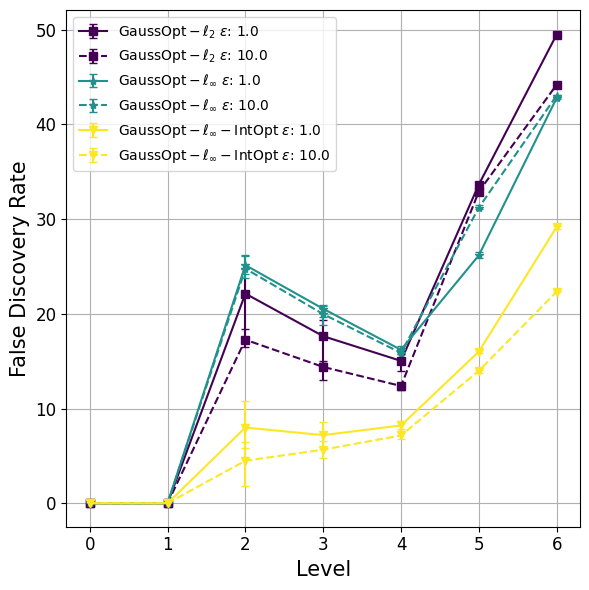

In [45]:
plot(metrics_to_plot["false_discovery_rate"], y_label="False Discovery Rate", log=False, save_to=save_to, name="false_discovery_rate")

## False Negative Rate

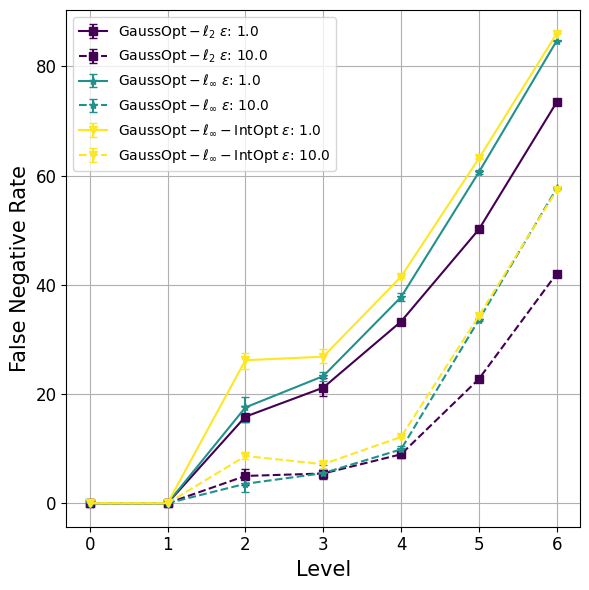

In [46]:
plot(metrics_to_plot["false_negative_rate"], y_label="False Negative Rate", log=False, save_to=save_to, name="false_negative_rate")

## Time

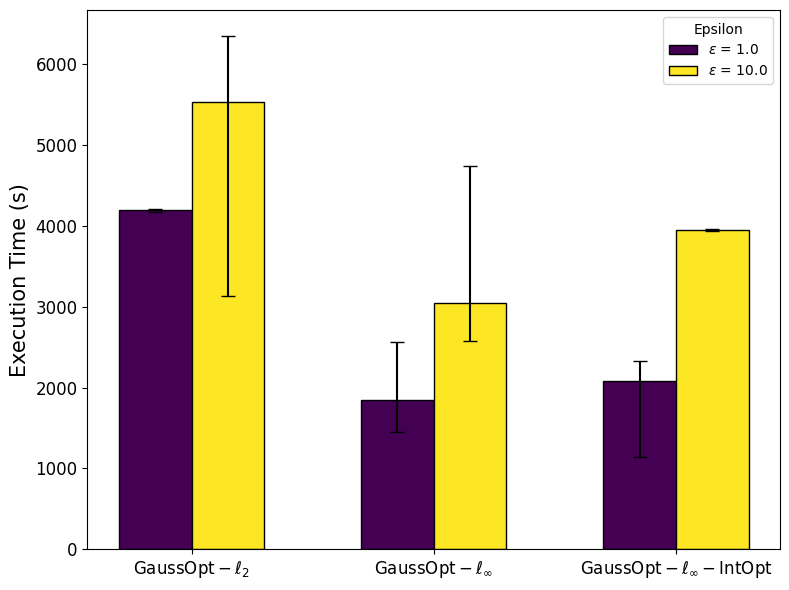

In [54]:
plot_time(metrics_to_plot["TIME"], save_to=save_to, name="time")